<h1><center>Laboratorio 4: Spark y EDA</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Belén Órdenes
- Nombre de alumno 2: Javiera Donoso


### **Link de repositorio de GitHub:** [Repositorio](https://github.com/javieradonoso/Repositorio-MDS7202.git)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Jueves a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo y análisis de grandes volúmenes de datos por medio de la libreria `pyspark`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl

## 1. Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1.	Apache Spark es un motor de procesamiento distribuido diseñado para manejar grandes volúmenes de datos. Sus principales ventajas sobre Pandas son la capacidad de procesar datos en paralelo y en clústeres distribuidos, permitiendo manejar datasets mucho más grandes y complejos, mientras que Pandas se limita a datos que pueden caber en memoria.También es más rápido que Pandas porque puede distribuir el trabajo en múltiples computadoras.

2.	Un RDD (Resilient Distributed Dataset) es una colección distribuida e inmutable de elementos que constituye el pilar fundamental de Apache Spark, este modelo permite que Spark realice operaciones de computación en paralelo de manera eficiente. Su principal característica son las dependencias  y la partición automática en clústeres. Los dataframes en Spark son una abstracción más moderna que se construye sobre los RDD, proporcionando una API más amigable y optimizaciones adicionales.

3.  Las transformaciones son operaciones que generan un nuevo DataFrame a partir de uno existente sin modificar el conjunto de datos original, un ejemplo de transformación es la función filter() la cual se encarga de filtrar los datos dada una condición. Por otro lado, las acciones son las operaciones que desencadenan la ejecución de todas las transformaciones acumuladas y devuelven los resultados obtenidos, un ejemplo sería la función count(), la cual se utiliza para calcular el número total de registros en un RDD o DataFrame. Cuando se ejecuta una acción en Spark, se construye un DAG que optimiza y divide el plan en etapas. Luego, distribuye las tareas a los ejecutores para procesar los datos en paralelo, y los resultados se envían al driver, completando la ejecución.

4.	El particionamiento en Spark es clave para dividir los datos entre nodos en un clúster, afectando directamente el rendimiento. Un buen particionamiento balancea la carga de trabajo entre nodos, reduciendo la sobrecarga de comunicación y maximizando el procesamiento paralelo.

5.	El Spark Driver coordina la ejecución de las aplicaciones, traduciendo el código en tareas distribuidas. Los Spark Executors son los encargados de ejecutar las tareas en los nodos del clúster, almacenando y procesando los datos asignados por el Driver.

6.	El Catalyst Optimizer es el optimizador de consultas SQL en Spark. Su función principal es mejorar el rendimiento de las consultas transformando y reorganizando los planes de ejecución, utilizando reglas de optimización y estadísticas para generar planes eficientes.


## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [8]:
# !pip install pyspark
#!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
import os
os.environ["JAVA_HOME"] = "/Library/Java/JavaVirtualMachines/amazon-corretto-11.jdk/Contents/Home"

In [9]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
# !pip install --upgrade plotly
# !pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Cargue los datos usando **pyspark**

> Nota: Puede ser util el siguiente [enlace](https://www.oracle.com/cl/java/technologies/downloads/#jdk22-windows)

In [10]:
# Comenzamos inicializando una SparkSession
sparksession = SparkSession.builder.master("local").appName("Lab_4").getOrCreate()

24/09/12 18:11:18 WARN Utils: Your hostname, MacBook-Air-de-Javiera-Aurora.local resolves to a loopback address: 127.0.0.1; using 192.168.1.123 instead (on interface en0)
24/09/12 18:11:18 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/12 18:11:18 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/09/12 18:11:19 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [12]:
# Cargar los datos desde el archivo parquet
df = (
    sparksession.read
    .option("header",'True')
    .parquet("datos_lab_spark.parquet")
)

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Cree una función **cast_columns** que permita cambiar el tipo de datos de las columnas problemáticas. Luego utilice esta función respecto a lo respondido en la pregunta anterior.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [13]:
# 1. usar .printSchema() para ver estructura
df.printSchema()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [14]:
# 2. Mostrar primeras 10 filas con show()
df.show(10)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+
|4b4a5fe1-ec4d-4f9...|d1b87f62-51b2-493...|             58.09|2022-03-24 00:00:00| bank transfer|     electronics|     1.0|        17.0|    Amandaborough|       NULL| 212.195.49.198|Unit 

In [15]:
# 3. Muestreo aleatorio con 5% de los datos
df.sample(fraction=0.05, seed=3).show()

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age| Customer Location|Device Used|    IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+------------------+-----------+--------------+--------------------+--------------------+-----------+----------------+----------------+
|                NULL|a748a557-cf3d-481...|              NULL|               NULL|   credit card|   home & garden|     2.0|        13.0|          West Amy|     tablet|123.118.78.180|37175

In [16]:
# 4. Ver los dtypes
df.dtypes

[('Transaction ID', 'string'),
 ('Customer ID', 'string'),
 ('Transaction Amount', 'double'),
 ('Transaction Date', 'timestamp_ntz'),
 ('Payment Method', 'string'),
 ('Product Category', 'string'),
 ('Quantity', 'double'),
 ('Customer Age', 'double'),
 ('Customer Location', 'string'),
 ('Device Used', 'string'),
 ('IP Address', 'string'),
 ('Shipping Address', 'string'),
 ('Billing Address', 'string'),
 ('Is An Alien', 'double'),
 ('Account Age Days', 'double'),
 ('Transaction Hour', 'double')]

Observamos que todas las variables del tipo `string` están bien clasificadas. "Transaction Date" también ya que es del tipo `timestamp_ntz` que es hora en Pyspark. Por lo tanto, podemos hacer correcciones en los tipos `double`, ya que "Quantity", "Customer Age", "Is An Alien", "Account Age Days" y "Transaction Hour" pueden ser enteros (`int`). Los datos que pueden ser del tipo `double` (decimal) es "Transaction Amount" (obligatoriamente) y "Transaction Hours".

In [17]:
# 5. Crear función cast_columns que cambie el tipo de una o más columnas
def cast_columns(df, cols_types):
    """
    Cambia el tipo de múltiples columnas en un DataFrame de Spark.

    Parámetros:
    - df: DataFrame de Spark.
    - cols_types: Diccionario con nombres de columnas como claves y tipos de datos de Spark como valores.

    Retorna:
    - DataFrame de Spark con tipos de columnas modificados.
    """
    # referencia de la clase
    for col_name, new_type in cols_types.items():
        df = df.withColumn(col_name, df[col_name].cast(new_type))
    return df

# cambiamos los tipos de las columnas necesarias
cols_to_cast = {
    "Quantity": IntegerType(),          # cantidad: num. entero
    "Customer Age": IntegerType(),      # edad: num. entero
    "Is An Alien": IntegerType(),       # booleando: num. entero (0 o 1)
    "Account Age Days": IntegerType()  # días: num. entero
    }

df = cast_columns(df, cols_to_cast)
df.printSchema()     # observamos los cambios

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Customer Age: integer (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: integer (nullable = true)
 |-- Account Age Days: integer (nullable = true)
 |-- Transaction Hour: double (nullable = true)



In [18]:
# 6. Contar nulos por variables

from pyspark.sql.functions import when, rand, col, sum

# se recorre cada columna (c), 
# luego, se crea una expresión condicional con 'when' que es 1 si en la fila hay nulo y 0 si no
# suma todos los 1's (nulos) de la columna y con 'alias' le asigna el nombre de la columa
exprs = [sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns]
df.agg(*exprs).show()    # aplica lista 'exprs' con el método agregación ('agg') y muestra ('show')

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+
|        126886|     126847|            126840|          126831|        126877|          126814|  126966|      126826|           126781|     126911|    126929|          126734|         126804|     126828|          126886|          126953|
+--------------+-----------+----------------

In [19]:
# 7. Eliminar datos nulos
df = df.na.drop()

In [20]:
# 8. Eliminar datos duplicados
df = df.dropDuplicates()

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 4 productos o menos.
  * Compra mayorista: 5 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [21]:
# 1. Agregar columna "Transaction bp"
from pyspark.sql.functions import col, log, abs, pow, round  # funciones a usar

# Aplicar la fórmula y crear la nueva columna "Transaction bp"
df = df.withColumn("Transaction bp", log(48 + abs(pow(col("Transaction Amount"), 36))))
df = df.withColumn("Transaction bp", round(col("Transaction bp"),2))    # redondear

df.select("Transaction Amount", "Transaction bp").show(5)  # mostrar primeras filas

+------------------+--------------+
|Transaction Amount|Transaction bp|
+------------------+--------------+
|            235.42|        196.61|
|            184.99|        187.93|
|            467.28|        221.29|
|            538.95|        226.43|
|            209.47|         192.4|
+------------------+--------------+
only showing top 5 rows



In [22]:
# 2. Crear columna "Transaction Month"
from pyspark.sql.functions import month

df = df.withColumn("Transaction Month", month(col("Transaction Date")))
df.select("Transaction Date", "Transaction Month").show(5)   # mostrar primeras filas

+-------------------+-----------------+
|   Transaction Date|Transaction Month|
+-------------------+-----------------+
|2022-12-04 00:00:00|               12|
|2021-11-14 00:00:00|               11|
|2022-05-28 00:00:00|                5|
|2022-09-21 00:00:00|                9|
|2022-05-24 00:00:00|                5|
+-------------------+-----------------+
only showing top 5 rows



In [23]:
# 3. Crear columna "Type of purchase" según unidades vendidas
df = df.withColumn("Type of purchase", 
                   when(col("Quantity") <= 4, "Compra minorista")  # condición, si se cumple, se completa
                   .otherwise("Compra mayorista"))                 # resultado en caso contrario

df.select("Quantity", "Type of purchase").show(5)

+--------+----------------+
|Quantity|Type of purchase|
+--------+----------------+
|       2|Compra minorista|
|       5|Compra mayorista|
|       1|Compra minorista|
|       5|Compra mayorista|
|       2|Compra minorista|
+--------+----------------+
only showing top 5 rows



In [24]:
# 4. Registros de compras hechas por alienígenas en el comecio mayorista
df_aliens_mayorista = df.filter((col("Is An Alien") == 1) & (col("Type of purchase") == "Compra mayorista"))
df_aliens_mayorista.show(5)


+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|      Transaction ID|         Customer ID|Transaction Amount|   Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|     IP Address|    Shipping Address|     Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction bp|Transaction Month|Type of purchase|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|95c9588e-e338-465...|9e56830c-04a3-4

In [25]:
# 5. Contar la cantidad de compras realizadas por humanos y las de alienígenas
from pyspark.sql.functions import count

# agrupar por "Is An Alien" y contar la cantidad de transacciones, nombra la col como "Total Compras"
df_grouped = df.groupBy("Is An Alien").agg(count("*").alias("Total Compras"))

# agregar aclaración de quien compra
df_grouped = df_grouped.withColumn(
    "Tipo de Compra", 
    when(col("Is An Alien") == 1, "Compra alien")
    .otherwise("Compra humano")
)

df_grouped.show()


+-----------+-------------+--------------+
|Is An Alien|Total Compras|Tipo de Compra|
+-----------+-------------+--------------+
|          1|          688|  Compra alien|
|          0|        12700| Compra humano|
+-----------+-------------+--------------+



In [26]:
# 6. Tabla con la recaudación promedio por transacción para cada método de pago

# Agrupar por método de pago y realizar un pivot para alienígenas y humanos
df_pivot = df.groupBy("Payment Method").pivot("Is An Alien").mean("Transaction Amount")

# Renombrar las columnas resultantes del pivot (0: humanos, 1: alienígenas)
df_pivot = df_pivot.withColumnRenamed("0", "Prom Humanos (0)").withColumnRenamed("1", "Prom Alienígenas (1)")

# Mostrar el resultado
df_pivot.show()

+--------------+------------------+--------------------+
|Payment Method|  Prom Humanos (0)|Prom Alienígenas (1)|
+--------------+------------------+--------------------+
|    debit card|215.21641883519177|   547.1965168539325|
| bank transfer|215.15149230285897|   547.6004624277457|
|        PayPal|  215.125985847539|   469.5177647058822|
|   credit card| 206.3112232704393|    517.753053892216|
+--------------+------------------+--------------------+



In [27]:
# Extra: Agregamos una columna llamada "Comprador"

# Crear la columna "Comprador" que será "Alien" si "Is An Alien" == 1, y "Humano" si es 0
df = df.withColumn(
    "Comprador", when(df["Is An Alien"] == 1, "Alien").otherwise("Humano")
)

# Ver primeros registros para verificar
df_aliens = df.select("Is An Alien", "Comprador")
df_aliens.sample(fraction=0.05, seed=2).show(7)

+-----------+---------+
|Is An Alien|Comprador|
+-----------+---------+
|          0|   Humano|
|          0|   Humano|
|          0|   Humano|
|          0|   Humano|
|          0|   Humano|
|          0|   Humano|
|          1|    Alien|
+-----------+---------+
only showing top 7 rows



### 4. EDA [20 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas** (2 puntos): Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas** (2 puntos por visualización):
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas** (2 puntos por visualización):
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones** (2 puntos por visualización):
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

--------------

##### 4.2 Conversión del DataFrame a Pandas

In [28]:
# Convertir a DataFrame de Pandas
df_pandas = df.toPandas()
df_pandas.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is An Alien,Account Age Days,Transaction Hour,Transaction bp,Transaction Month,Type of purchase,Comprador
0,69a870c5-16c3-42ce-8ece-613cdb4bc31b,d52475ee-9075-4dc2-9f24-91bd3a262bf5,235.42,2022-12-04,bank transfer,home & garden,2,50,Bushtown,tablet,182.154.224.84,"00583 Sandra Haven\nNew Christopher, WA 58513","00583 Sandra Haven\nNew Christopher, WA 58513",0,164,1.0,196.61,12,Compra minorista,Humano
1,f62d6a76-74c5-46b0-9b1f-ab633d1b0e9f,ae294097-89b5-4202-9e42-b13af126475d,184.99,2021-11-14,credit card,electronics,5,45,Parkside,tablet,190.7.15.127,"96673 Darlene Motorway\nSouth Mistyville, DC 6...","96673 Darlene Motorway\nSouth Mistyville, DC 6...",0,136,13.0,187.93,11,Compra mayorista,Humano
2,cd8bd44c-a265-414f-91d3-98abb77b3417,89491c68-da79-45d4-befb-dbbcd112998d,467.28,2022-05-28,credit card,clothing,1,31,Colemanstad,mobile,189.172.200.105,"37540 Ortiz Path Suite 825\nEast David, AZ 93884","37540 Ortiz Path Suite 825\nEast David, AZ 93884",0,200,10.0,221.29,5,Compra minorista,Humano
3,54c166da-06e3-4cf6-9f81-0d7609de0f95,8ef7b6ca-7462-4bd5-a5a3-8bc491d8ce27,538.95,2022-09-21,PayPal,toys & games,5,31,Jamieside,tablet,172.177.116.9,"52897 Aaron Park\nNew Larry, MN 41074","52897 Aaron Park\nNew Larry, MN 41074",0,35,3.0,226.43,9,Compra mayorista,Humano
4,6e9148bd-77f8-444e-8c14-9b29829533dc,7382901b-5f27-40dd-b338-7d22a8bcc869,209.47,2022-05-24,bank transfer,home & garden,2,17,North Ericton,mobile,53.118.231.154,"71281 Jonathan Glens Apt. 354\nWest Jasonfurt,...","71281 Jonathan Glens Apt. 354\nWest Jasonfurt,...",0,99,23.0,192.40,5,Compra minorista,Humano


In [29]:
# Convertir variables tipo "object" a "category"
df_pandas = pd.concat(
    [
        df_pandas.select_dtypes([], ["object"]),
        df_pandas.select_dtypes(["object"]).apply(pd.Series.astype, dtype="category"),
    ],
    axis=1,
)

df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13388 entries, 0 to 13387
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Transaction Amount  13388 non-null  float64       
 1   Transaction Date    13388 non-null  datetime64[ns]
 2   Quantity            13388 non-null  int32         
 3   Customer Age        13388 non-null  int32         
 4   Is An Alien         13388 non-null  int32         
 5   Account Age Days    13388 non-null  int32         
 6   Transaction Hour    13388 non-null  float64       
 7   Transaction bp      13388 non-null  float64       
 8   Transaction Month   13388 non-null  int32         
 9   Transaction ID      13388 non-null  category      
 10  Customer ID         13388 non-null  category      
 11  Payment Method      13388 non-null  category      
 12  Product Category    13388 non-null  category      
 13  Customer Location   13388 non-null  category  

In [30]:
# Creamos subset de data numerica y categorical
col_numeric = df_pandas.select_dtypes(["int32", "float64"]).columns
col_categorical = df_pandas.select_dtypes(["category"]).columns

##### 4.2 Visualización de variables Categóricas con gráficos de barras

In [31]:
# (Extra) Primero, visualizaremos un gráfico de torta para comparar "Alien" y "Humano"
px.pie(df_pandas, 
        names="Comprador",  # Columna que tiene "Alien" o "Humano"
        title="Distribución de Compradores: Humanos vs Alienígenas",
        hole=0.3)

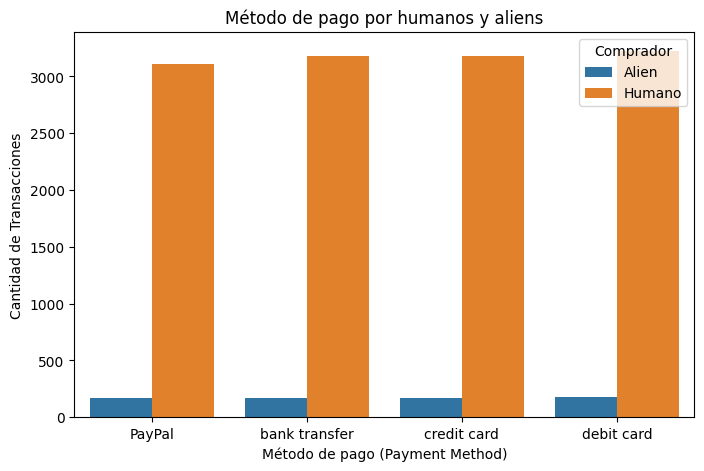

In [32]:
# a. Gráfico de barras para "Payment Method" diferenciado por tipo de comprador
plt.figure(figsize=(8,5))
sns.countplot(x="Payment Method", hue="Comprador", data=df_pandas)
plt.title("Método de pago por humanos y aliens")
plt.xlabel("Método de pago (Payment Method)")
plt.ylabel("Cantidad de Transacciones")
plt.show()

Podemos ver en primer lugar que siempre para cada uno de los métodos de pago el ser Alien siempre tiene menores cantidades en las transacciones que el ser humano, de igual manera, al ser Alien se tiene que la cantidad de transacciones no llega a pasar las 500 para cada método de pagos, en cambio, el ser humano pasa la cantidad de 3000 transacciones para cada uno de los métodos de pago

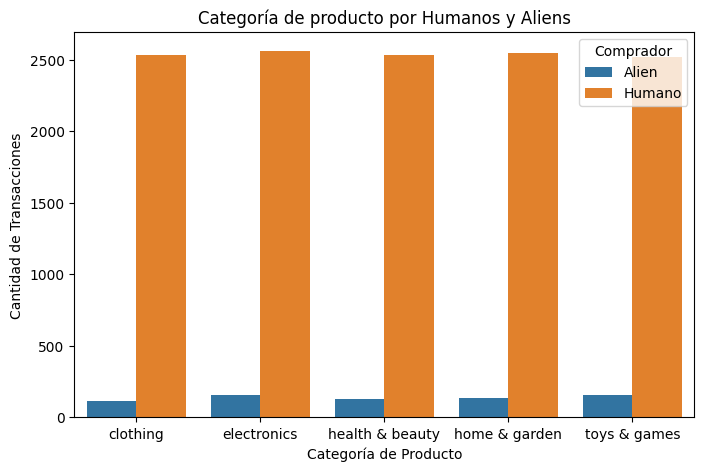

In [33]:
# b. Gráfico de barras para "Product Category" diferenciado por tipo de comprador
plt.figure(figsize=(8,5))
sns.countplot(x="Product Category", hue="Comprador", data=df_pandas)
plt.title("Categoría de producto por Humanos y Aliens")
plt.xlabel("Categoría de Producto")
plt.ylabel("Cantidad de Transacciones")
plt.show()

Aquí pasa algo similar que en el gráfico anterior, se tienen que para cada uno de las categorías de productos no pasa las 500 transacciones para el caso de los Aliens, se puede observar de igual manera un comportamiento similar para los humanos y Aliens en que cada una de las categorías tiene un balance en la cantidad de transacciones y no hay alguna categoria que tenga más cantidades de transacciones que otros.

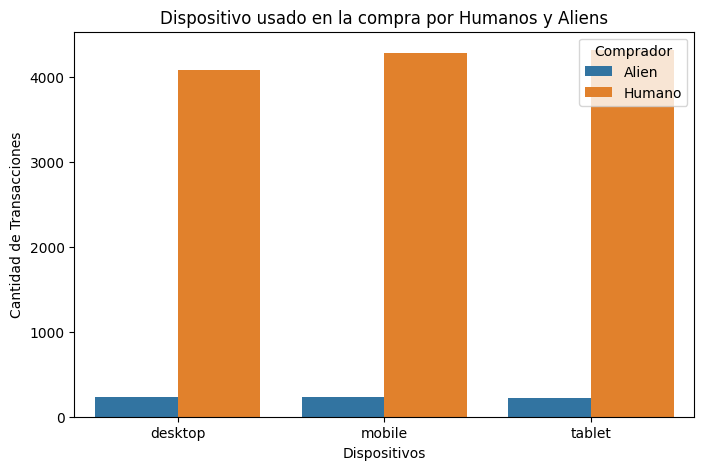

In [34]:
# c. Gráfico de barras para "Device Used" diferenciado por tipo de comprador
plt.figure(figsize=(8,5))
sns.countplot(x="Device Used", hue="Comprador", data=df_pandas)
plt.title("Dispositivo usado en la compra por Humanos y Aliens")
plt.xlabel("Dispositivos")
plt.ylabel("Cantidad de Transacciones")
plt.show()

Por último, se puede observar un comportamiento similar que los dos gráficos anteriores, se tiene que cuando uno es Alien el dispositivo utilizado respecto a la cantidad de transacciones no supera los 1000, en cambio, cuando un es humano esta cantidad supera las 4000 para todos los tipos de dispositivos, no obstante, se tiene que el computador se ocupa un poco menos que los celulares y tablets.

##### 4.3 Visualización de variables Numéricas con distplots

In [61]:
# a. Distplot para "Transaction Amount" diferenciando entre humanos y alienígenas
fig_a = px.histogram(df_pandas, 
            x="Transaction Amount", 
            color="Comprador",  # Diferenciar entre humanos y alienígenas
            marginal="box",  # Opcional: añade un gráfico de caja
            title="Distribución del Monto de transacción por Humanos y Aliens",
            labels={"Transaction Amount": "Monto de Transacción (USD)"}, 
            nbins=50,  # Ajusta el número de bins
            opacity=0.7,
            barmode="overlay")

fig_a.show()

El gráfico muestra la distribución del monto de las transacciones realizadas por humanos y alienígenas. Se puede observar que la mayoría de las transacciones se concentran en montos bajos, especialmente por parte de los humanos, con una gran acumulación de transacciones cercanas a cero. Los alienígenas, por otro lado, tienen transacciones más dispersas en un rango más amplio, aunque en menor cantidad. Los gráficos de caja en la parte superior también indican que los alienígenas tienen una mayor dispersión en sus transacciones y algunos outliers, mientras que las transacciones humanas están más concentradas alrededor de montos bajos.

In [62]:
# b. Distplot para "Customer Age" diferenciando entre humanos y alienígenas
fig_b = px.histogram(df_pandas, 
            x="Customer Age", 
            color="Comprador",  # Usamos la columna 'Comprador'
            marginal="box",  # Opcional: añade un gráfico de caja
            title="Distribución de la Edad del Cliente por Humanos y Aliens",
            labels={"Customer Age": "Edad del Cliente"},
            nbins=30, 
            opacity=0.7,
            barmode="overlay")
fig_b.show()

El segundo gráfico muestra la distribución de la edad del cliente diferenciada entre humanos y alienígenas, en donde la mayoría de los humanos se concentran en edades entre 20 y 50 años, y donde se tiene mayor cantidad es alrededor de los 30-40 años. En cambio, los alienígenas tienen una distribución de edad más dispersa,considerando que también se tienen menores datos. El gráfico de caja en la parte superior muestra que la mediana de edad de los humanos está alrededor de los 30 años, mientras que los alienígenas tienen edades más extremas. Además, los puntos en el gráfico indican outliers, lo que nos dice que los alienígenas tienen más variabilidad en la edad de los compradores en comparación con los humanos.

In [63]:
# c. Distplot para "Customer Age" diferenciando entre humanos y aliens
fig_c =px.histogram(df_pandas, 
            x="Quantity", 
            color="Comprador",  # Usamos la columna 'Comprador'
            marginal="box",  # Opcional: añade un gráfico de caja
            title="Distribución de Cantidad de productos por Humanos y Aliens",
            labels={"Quantity": "Cantidad de productos en la transacción"},
            nbins=30, 
            opacity=0.7,
            barmode="overlay")
fig_c.show()

Este último gráfico muestra la distribución de la cantidad de productos comprados por humanos y alienígenas en cada transacción, en donde se observa que la distribución es bastante uniforme entre ambos tipos de compradores, con una alta concentración en transacciones de una a cinco unidades, y los humanos son los compradores predominantes en todas las categorías. Los gráficos de caja en la parte superior indican que tanto los humanos como los alienígenas tienen una distribución similar en cuanto a la cantidad de productos por transacción, sin valores atípicos significativos. La mayoría de las transacciones involucran la compra de entre 1 y 5 productos, lo que sugiere que tanto humanos como alienígenas tienden a realizar compras de tamaño moderado.

##### 4.4 Análisis de Patrones en Transacciones

ELEGIRRRRR MEJORES

In [64]:
# a. Gráfico de Transacciones mensuales

# Convertir la columna "Transaction Date" a formato datetime si no está en ese formato
df_pandas["Transaction Date"] = pd.to_datetime(df_pandas["Transaction Date"])
df_pandas["Transaction Month"] = df_pandas["Transaction Date"].dt.to_period("M").astype(str)

# Contar la cantidad de transacciones por mes y por comprador (Humano vs Alien)
df_grouped = df_pandas.groupby(["Transaction Month", "Comprador"]).size().reset_index(name="Count")

# Graficar
fig_4= px.line(df_grouped, 
        x="Transaction Month", 
        y="Count", 
        color="Comprador",  # Diferenciar entre humanos y alienígenas
        title="Transacciones Mensuales por Humanos y Aliens",
        labels={"Count": "Cantidad de Transacciones", "Transaction Month": "Mes de la Transacción"})
fig_4.show()

/var/folders/f5/b1tb9vt55v18qtccdryvbmcm0000gn/T/ipykernel_2453/1422222651.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Se observa en el gráfico anterior que los humanos realizan un número significativamente mayor de transacciones mensuales, con un promedio cercano a las 150 transacciones por mes, y fluctuaciones moderadas a lo largo del tiempo. Por otro lado, las transacciones de los aliens son considerablemente menores, con un promedio por debajo de 20 transacciones mensuales, y sin cambios drásticos durante el periodo. A lo largo del tiempo, el patrón de transacciones de humanos muestra una tendencia más activa y variada en comparación con el comportamiento mucho más estable y bajo de los alienígenas.

In [57]:
# Gráfico temporal con datos de "Transaction Amount"
df_2020 = df_grouped[df_grouped["Transaction Month"] >= "2020-01"] # filtra desde 2020

df_temporal = (
    df_2020
    .groupby("Transaction Month") # agrupar por YearBuilt
    .agg({"Transaction Amount": ["mean", "std"]}) # Obtener media y desviación de SalePrice
    .sort_values("Transaction Month") # Ordenar por YearBuilt
    .reset_index()
)

# Renombrar columnas
df_temporal.columns = ["Transaction Month", "Transaction Amount Mean", "Transaction Amount Std"]
df_temporal.head()

,Transaction Month,Transaction Amount Mean,Transaction Amount Std
0,2020-01,293.680559,133.684817
1,2020-02,497.092113,414.519169
2,2020-03,284.097181,90.884178
3,2020-04,221.182369,27.738806
4,2020-05,449.080286,326.454634


In [65]:
# b. Gráfico promedio y desviación del precio de vivienda a través del tiempo
fig_4b= px.line(df_temporal, 
        y="Transaction Amount Mean", 
        x="Transaction Month", 
        error_y="Transaction Amount Std")
        
fig_4b.show()

En el gráfico anterior se muestra la media mensual del monto de las transacciones con barras de error que reflejan la variabilidad en los datos para cada mes, desde 2020 hasta 2025, en el se observa que el promedio de las transacciones fluctúa a lo largo del tiempo, con niveles pronunciados en ciertos meses, particularmente en 2022 y 2024. La gran variabilidad en algunos meses, representada por las barras de error más largas, indica una mayor dispersión en los montos de transacción en esos periodos. A pesar de estas fluctuaciones, los valores tienden a mantenerse dentro del rango de los 0 a 1000 unidades, lo que sugiere que, aunque existen valores más altos, el comportamiento promedio no cambia drásticamente mes a mes.

In [66]:
# c. Gráfico de monto promedio de transacciones por mes diferenciado por comprador

# Agrupar mes y comprador para obtener promedio
df_grouped = df_pandas.groupby(["Transaction Month", "Comprador"])["Transaction Amount"].mean().reset_index()

# Crear el gráfico de líneas para mostrar el monto promedio por mes diferenciado por comprador
fig_4c = px.line(df_grouped, 
        x="Transaction Month", 
        y="Transaction Amount", 
        color="Comprador", 
        title="Monto promedio de transacciones por mes y comprador",
        labels={"Transaction Amount": "Monto Promedio (USD)", "Transaction Month": "Mes de la Transacción"})
        
fig_4c.show()

/var/folders/f5/b1tb9vt55v18qtccdryvbmcm0000gn/T/ipykernel_2453/3206937142.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Este gráfico muestra la evolución del monto promedio de las transacciones por mes, diferenciando entre humanos y alienígenas desde 2018 hasta 2024, en el se puede observar que los humanos mantienen un monto promedio de transacción bastante estable a lo largo del tiempo, alrededor de los 200 USD, con pocas fluctuaciones. Por otro lado, los alienígenas presentan una mayor variabilidad en el monto promedio, con niveles muy altos que alcanzan hasta los 1400 USD y caídas pronunciadas en varios momentos. Estas alteraciones sugieren que las transacciones alienígenas, aunque menos frecuentes, son mucho más volátiles en cuanto a montos, mientras que las transacciones humanas tienden a ser más consistentes y predecibles.

In [67]:
# c. Gráfico de coordenadas paralelas

# Categorizar "Transaction Amount" en sus cuartiles
df_pandas["Transaction Amount Cut"] = pd.qcut(
    df_pandas["Transaction Amount"], 4, ["Low", "Low-Mid", "Mid-High", "High"]
)

fig_paralel = px.parallel_categories(
    df_pandas.sample(200, random_state = 15).sort_values("Transaction Amount Cut", ascending=False),
    dimensions=[
        "Quantity",
        "Product Category",
        "Payment Method",
        "Device Used",
        "Transaction Amount Cut"
    ],
    color="Transaction Amount",
    title="Gráfico de categorias paralelas"
)
fig_paralel.show()


Este gráfico de categorías paralelas muestra la relación entre varias dimensiones de las transacciones: la cantidad de productos comprados, la categoría del producto, el método de pago, el dispositivo utilizado y el rango del monto de la transacción. Las líneas conectan las categorías correspondientes entre cada eje, y el color de las líneas indica el monto de la transacción, con tonos más claros para montos altos y tonos más oscuros para montos bajos. Se observa que las categorías como “electronics” y “home & garden” están más asociadas con montos de transacción altos, mientras que “clothing” y “toys & games” tienden a asociarse con montos más bajos. Además, el uso de dispositivos como “desktop” parece correlacionarse con transacciones de mayor valor. 

### 5. Particiones y consultas en SQL [2 puntos]

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark** (2 puntos):
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes** (Bonus: 2 punto):
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark** (Bonus: 2 punto):
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [48]:
#Para evitar problemas, colocamos los guiones entre las palabras
df = df.select("*")
for col_name in df.columns:
  df = df.withColumnRenamed(col_name, col_name.replace(" ", "_"))
df.show(3)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+--------------+-----------------+----------------+---------+
|      Transaction_ID|         Customer_ID|Transaction_Amount|   Transaction_Date|Payment_Method|Product_Category|Quantity|Customer_Age|Customer_Location|Device_Used|     IP_Address|    Shipping_Address|     Billing_Address|Is_An_Alien|Account_Age_Days|Transaction_Hour|Transaction_bp|Transaction_Month|Type_of_purchase|Comprador|
+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+----------------+--------------+-----------------+----------------+---------+
|69a870

In [51]:
# Código Aquí
#1. Creación tabla, y se decide utilizar Customer ID para la partición
df.write.partitionBy("Customer_ID").saveAsTable("transacciones_lab")

24/09/12 19:16:43 WARN TaskSetManager: Stage 70 contains a task of very large size (2401 KiB). The maximum recommended task size is 1000 KiB.


Se utiliza la variable Customer ID, ya que a partir de esta facilitará la realización de consultas eficientes basadas en este campo. Considerando que el DataFrame contiene una gran cantidad de datos, se considera óptimo particionar por el cliente. Además el ID al ser único por cliente nos puede ayudar para conocer acerca de cada cliente. El código demora en correr aproximadamente 10 min.

In [54]:
#2.Mostrar los principales 10 clientes que más productos han comprado
top_10_clientes = sparksession.sql("""
    SELECT `Customer_ID`, SUM(`Quantity`) AS Total_Productos_Comprados
    FROM transacciones_lab
    GROUP BY (`Customer_ID`)
    ORDER BY Total_Productos_Comprados DESC
    LIMIT 10
""")

# Mostrar el resultado
top_10_clientes.show()

+--------------------+-------------------------+
|         Customer_ID|Total_Productos_Comprados|
+--------------------+-------------------------+
|adcfac88-aefb-44e...|                        5|
|fafd2a5b-1402-409...|                        5|
|10c58adb-d0c8-4a4...|                        5|
|77e2117c-90c9-48b...|                        5|
|a4dc4ce9-325f-4ba...|                        5|
|d5a354bf-2e59-4d5...|                        5|
|66c6cfe6-f400-4aa...|                        5|
|b32a9429-5470-4c3...|                        5|
|1ba27c58-e28f-4b1...|                        5|
|4c38e73f-28e1-450...|                        5|
+--------------------+-------------------------+



In [55]:
# 3. Utilizando SQL
result_df = sparksession.sql("""
    SELECT 
        Customer_ID, 
        MAX(Transaction_Amount) OVER (
            PARTITION BY Customer_ID 
            ORDER BY Transaction_Date 
            RANGE BETWEEN INTERVAL 3 MONTH PRECEDING AND CURRENT ROW
        ) AS max_purchase_last_3_months
    FROM 
        transacciones_lab
""")

# Mostrar los resultados
result_df.show()

+--------------------+--------------------------+
|         Customer_ID|max_purchase_last_3_months|
+--------------------+--------------------------+
|0005f674-821d-4c4...|                    107.11|
|000695ce-4310-416...|                    689.58|
|0010bfa7-d3b5-442...|                    130.74|
|001341a1-ce95-4f6...|                    222.59|
|0013653b-9ed4-4fa...|                    749.29|
|0027a40f-9d45-422...|                     84.59|
|0028d9e7-55bf-4e6...|                    221.28|
|002a2b79-e86c-478...|                    331.93|
|0034597d-5db9-4ef...|                    221.23|
|0035807b-8ab5-4f8...|                    175.59|
|0037cc7b-fb0b-433...|                    132.98|
|003b44c7-7a97-47d...|                     82.02|
|003bddcf-270a-474...|                    289.59|
|004d6df5-5d37-4cd...|                     32.36|
|004de8d7-e274-4f3...|                     74.56|
|005599ec-2770-498...|                     40.28|
|0055c3b0-82b2-4d2...|                    384.07|


In [56]:
#Equivalente utilizando PySpark
from pyspark.sql import Window
from pyspark.sql.functions import max, col, current_date, expr, row_number

# Definir ventana de tres meses
ventana = Window.partitionBy("Customer_ID").orderBy(col("Transaction_Date").desc())

# Filtrar transacciones de los últimos tres meses
transacciones_ultimos_3_meses = df.filter(df["Transaction_Date"] >= (current_date() - expr("INTERVAL 3 MONTH")))

# Calcular la compra más alta realizada por cada usuario en los últimos tres meses utilizando SQL
resultado_sql = transacciones_ultimos_3_meses \
    .selectExpr("*", "ROW_NUMBER() OVER (PARTITION BY `Customer_ID` ORDER BY `Transaction_Date` DESC) AS rn") \
    .where(col("rn") == 1) \
    .groupBy("Customer_ID") \
    .agg(max("Transaction_Amount").alias("maximo de compras últimos 3 meses"))

# Mostrar el resultado
resultado_sql.show()

+--------------------+---------------------------------+
|         Customer_ID|maximo de compras últimos 3 meses|
+--------------------+---------------------------------+
|0084aeb6-6bc7-4f8...|                           265.09|
|00dba4f3-102b-4d8...|                            80.76|
|011ba8d6-6dcd-4cf...|                           218.64|
|014817a0-2f4f-477...|                           289.72|
|014da57c-a59c-465...|                            33.22|
|01754c8a-c873-49e...|                           267.89|
|0178fe5b-e055-4ec...|                           723.04|
|01ac1427-4acc-410...|                           234.43|
|01feca2f-2907-445...|                            48.71|
|03557036-602b-4f5...|                             29.8|
|03c61a84-77db-4aa...|                           269.66|
|0464bbaa-d5e0-41c...|                           425.34|
|04c9816c-3a7a-41a...|                           707.63|
|04d42160-5adb-4ff...|                           174.46|
|04fa4322-5441-419...|         

24/09/12 19:35:36 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 228277 ms exceeds timeout 120000 ms
24/09/12 19:35:36 WARN SparkContext: Killing executors is not supported by current scheduler.
24/09/12 19:35:44 ERROR Inbox: Ignoring error
org.apache.spark.SparkException: Exception thrown in awaitResult: 
	at org.apache.spark.util.SparkThreadUtils$.awaitResult(SparkThreadUtils.scala:56)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:310)
	at org.apache.spark.rpc.RpcTimeout.awaitResult(RpcTimeout.scala:75)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRefByURI(RpcEnv.scala:102)
	at org.apache.spark.rpc.RpcEnv.setupEndpointRef(RpcEnv.scala:110)
	at org.apache.spark.util.RpcUtils$.makeDriverRef(RpcUtils.scala:36)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.driverEndpoint$lzycompute(BlockManagerMasterEndpoint.scala:124)
	at org.apache.spark.storage.BlockManagerMasterEndpoint.org$apache$spark$storage$BlockManagerMasterEndpoint$$

### 6. UDF [12 puntos]

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col1, col2, col3, col4):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función. (1 punto)
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad. (1 punto)
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito. (6 puntos)
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado. (2 punto)
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf? (2 puntos)

In [ ]:
# Librerías
import pickle
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

In [ ]:
# 1. Cargar objeto serializado

# Ruta al archivo .pkl que te han proporcionado
ruta_al_archivo_pkl = "/Users/belenordenes/Desktop/LABORATORIO/Repositorio-MDS7202/Laboratorio_4/object.pkl"

# Cargar el objeto serializado
with open(ruta_al_archivo_pkl, "rb") as archivo:
    obj_serializado = pickle.load(archivo)

/Users/belenordenes/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:348: InconsistentVersionWarning:

Trying to unpickle estimator LogisticRegression from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



In [ ]:
# 2. Explorar el objeto con dir y help

# Ver los métodos y atributo
dir(obj_serializado)

['C',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'class_weight',
 'classes_',
 'coef_',
 'decision_function',
 'densify',
 'dual',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'intercept_

In [ ]:
# Identificar método que predice con help
help(obj_serializado)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

Observamos que el método del objeto es `LogisticRegression` de `scikit-learn` y tiene 2 métodos de predicciones:

1. `predict(self, X)`: devuelve las clases predichas (return `y_pred`: Vector containing the class labels for each sample)
2. `predict_proba`: devuelve las probabilidades estimadas de las clases predichas. (return `T`: Returns the probability of the sample for each class in the model, where classes are ordered as they are in `self.classes_`)

In [ ]:
# 3. Crear una función personalizada que prediga la probabilidad de fraude utilizando el 
#    último valor de la lista generada por el objeto serializado

def predict_fraude(df_columnas):
    # Obtener el último valor de las características
    ultimo_valor = df_columnas.iloc[[-1]]
    
    # Predecir la probabilidad de fraude utilizando el modelo
    probabilidad_fraude = obj_serializado.predict_proba(ultimo_valor)[:, 1]  # Probabilidad de clase 1 (fraude)
    
    return probabilidad_fraude


In [ ]:
# Obtenemos las columnas que usa el objeto con el método: feature_names_in_
columnas = obj_serializado.feature_names_in_  # Obtener los nombres de las características
print(columnas)

['Transaction Amount' 'Quantity' 'Customer Age' 'Transaction Hour']


In [ ]:
# Asegurarse de que df_pandas tiene las mismas columnas que el modelo espera
df_columnas = df_pandas[columnas]

# predecir prob. de fraude con los últimos valores del dataset
resultado = predict_fraude(df_columnas)
print(f"Probabilidad de fraude: {resultado}")

Probabilidad de fraude: [0.05399892]


In [ ]:
# 4. Definir la función UDF

# Convertir la función en una UDF
fraude_udf = udf(predict_fraude, FloatType())


NameError: name 'udf' is not defined

In [ ]:
# 5. Generar una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF 
#    y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

df_con_fraude = df.withColumn(
    "prediction",  # Nuevo nombre de columna
    fraude_udf(
        df["Transaction Amount"], 
        df["Quantity"], 
        df["Customer Age"], 
        df["Transaction Hour"]
    )
)

# Mostrar el DataFrame con la nueva columna de probabilidad de fraude
df_con_fraude.show()

NameError: name 'fraude_udf' is not defined